In [11]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [12]:
from DataMacpy import *

In [13]:
# Veriyi içeri aktaralım.

# veri yolumuzu verelim
file_path = 'train.csv'

# verimizi okuyoruz. 
df = pd.read_csv(file_path)

print("Setup Complete")

Setup Complete


In [14]:
df

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,31.356284,Etmiyor,obek_6,51.600436
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,26.288620,Etmiyor,obek_6,49.190536
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,5.156906,Etmiyor,obek_1,9.537384
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.268016,Büyük Şehir,Ev ve Mobilya,9016.165906,39.205399,Ediyor,obek_8,143.281718


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,5460.0,2729.500000,1576.310566,0.000000,1364.750000,2729.500000,4094.250000,5.459000e+03
Cinsiyet,5460.0,0.457143,0.498206,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Yaş Grubu,5460.0,1.415751,1.357120,0.000000,0.000000,1.000000,3.000000,4.000000e+00
Medeni Durum,5460.0,0.519048,0.499683,0.000000,0.000000,1.000000,1.000000,1.000000e+00
Eğitim Düzeyi,5460.0,4.610073,2.258721,0.000000,3.000000,5.000000,7.000000,8.000000e+00
İstihdam Durumu,5460.0,1.148168,1.278504,0.000000,0.000000,0.000000,2.000000,3.000000e+00
Yıllık Ortalama Gelir,5460.0,363571.133428,219714.442407,43922.988693,215693.439307,286925.436073,468188.221798,1.192437e+06
Yaşadığı Şehir,5460.0,1.186264,1.037806,0.000000,0.000000,1.000000,2.000000,3.000000e+00
En Çok İlgilendiği Ürün Grubu,5460.0,1.937546,1.356273,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Yıllık Ortalama Satın Alım Miktarı,5460.0,16616.612217,14099.171704,2859.254000,4931.859057,8426.818967,30579.244695,4.860559e+04


In [17]:
y_not_enc = df["Öbek İsmi"]
y_not_enc

0       obek_4
1       obek_5
2       obek_8
3       obek_3
4       obek_3
         ...  
5455    obek_6
5456    obek_6
5457    obek_1
5458    obek_8
5459    obek_8
Name: Öbek İsmi, Length: 5460, dtype: object

In [18]:
# target verilerimiz string olduğu için LabelEncoder yapıyoruz. Her sınıfı bir sayıya atıyoruz.
l_fit = LabelEncoder().fit(y_not_enc)
y = l_fit.transform(y_not_enc)
#y = pd.DataFrame(y, columns = ["Type_1"]) # dataframe'e çevirmek için bu satırı kullanabiliriz.
y[0:20]

array([3, 4, 7, 2, 2, 7, 2, 4, 2, 5, 4, 0, 6, 2, 6, 4, 6, 5, 5, 5])

In [19]:
# labellerimizi buluyoruz.
y_label = l_fit.inverse_transform([i for i in range(max(y)+1)])
label_and_num = list(zip(y_label, [i for i in range(max(y)+1)]))
label_and_num

[('obek_1', 0),
 ('obek_2', 1),
 ('obek_3', 2),
 ('obek_4', 3),
 ('obek_5', 4),
 ('obek_6', 5),
 ('obek_7', 6),
 ('obek_8', 7)]

In [20]:
find_missing_cols(df)

[]

In [21]:
# özniteliklerimizi belirleyelim.
X = df
X.drop(["Öbek İsmi"], axis=1, inplace=True) # tüm verilerimizden hedef kolonumuzu çıkarıyoruz.
# Number kolonumuzu da gereksiz olduğu eğitimde gereksiz olduğu için çıkarıyoruz.
X

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,31.356284,Etmiyor,51.600436
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,26.288620,Etmiyor,49.190536
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,5.156906,Etmiyor,9.537384
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.268016,Büyük Şehir,Ev ve Mobilya,9016.165906,39.205399,Ediyor,143.281718


In [23]:
# DataMacpy kütüphanemizdeki fonksiyon ile benzersiz birimi 0'dan fazla olan veri tipi object içeren
# kolonları buluyoruz.
object_cols, d = calc_object_cols(X, 0)
d

{'Cinsiyet': 2,
 'Yaş Grubu': 5,
 'Medeni Durum': 2,
 'Eğitim Düzeyi': 9,
 'İstihdam Durumu': 4,
 'Yaşadığı Şehir': 4,
 'En Çok İlgilendiği Ürün Grubu': 5,
 'Eğitime Devam Etme Durumu': 2}

In [24]:
# Verilerimize OrdinalEncoder uyguluyoruz. OneHot denemesi yapılacak!
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])
X

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,1.0,1.0,0.0,5.0,0.0,748266.440879,0.0,0.0,32010.900881,37.310644,1.0,102.936904
1,1,0.0,4.0,1.0,3.0,2.0,246298.609605,2.0,4.0,4145.729891,11.554851,1.0,82.176053
2,2,0.0,0.0,0.0,3.0,0.0,268582.732360,2.0,2.0,9924.379414,55.353236,0.0,141.661426
3,3,0.0,3.0,1.0,3.0,2.0,327721.837865,3.0,2.0,6417.780714,15.417239,1.0,17.097397
4,4,0.0,1.0,1.0,4.0,3.0,397431.626948,0.0,2.0,7886.663061,14.689837,1.0,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,1.0,4.0,0.0,7.0,1.0,478054.247819,1.0,3.0,43182.299801,31.356284,1.0,51.600436
5456,5456,0.0,3.0,1.0,1.0,2.0,481852.853651,1.0,1.0,42107.996193,26.288620,1.0,49.190536
5457,5457,1.0,3.0,1.0,8.0,0.0,309443.687351,2.0,1.0,4655.392445,5.156906,1.0,9.537384
5458,5458,1.0,0.0,0.0,6.0,0.0,266604.268016,0.0,1.0,9016.165906,39.205399,0.0,143.281718


In [25]:
# Verilerimizi train ve validation olarak ayırıyoruz.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [26]:
X_train.shape

(4368, 13)

In [27]:
y_train.shape

(4368,)

In [30]:
X_valid.shape

(1092, 13)

In [31]:
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

 Toplam Doğruluk: % 81.00457816679081


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.720930,129,93,36,obek_1
1,obek_2,0.687500,112,77,35,obek_2
2,obek_3,0.698413,126,88,38,obek_3
3,obek_4,0.933333,150,140,10,obek_4
4,obek_5,0.685714,140,96,44,obek_5
5,obek_6,0.944444,144,136,8,obek_6
6,obek_7,0.947712,153,145,8,obek_7
7,obek_8,0.862319,138,119,19,obek_8


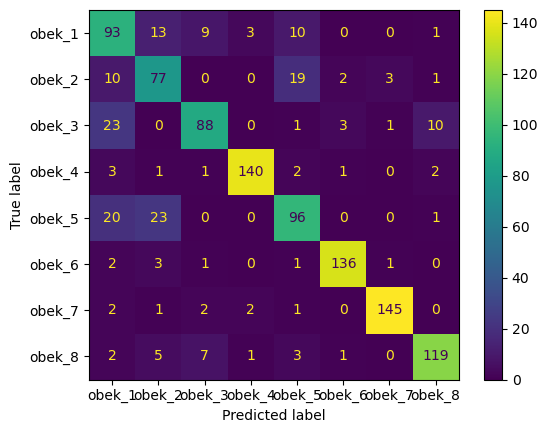

In [32]:
# KNN
model_fit_and_predict(KNeighborsClassifier(n_neighbors=3), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 90.56321225827708


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.930233,129,120,9,obek_1
1,obek_2,0.901786,112,101,11,obek_2
2,obek_3,0.880952,126,111,15,obek_3
3,obek_4,0.906667,150,136,14,obek_4
4,obek_5,0.942857,140,132,8,obek_5
5,obek_6,0.895833,144,129,15,obek_6
6,obek_7,0.895425,153,137,16,obek_7
7,obek_8,0.891304,138,123,15,obek_8


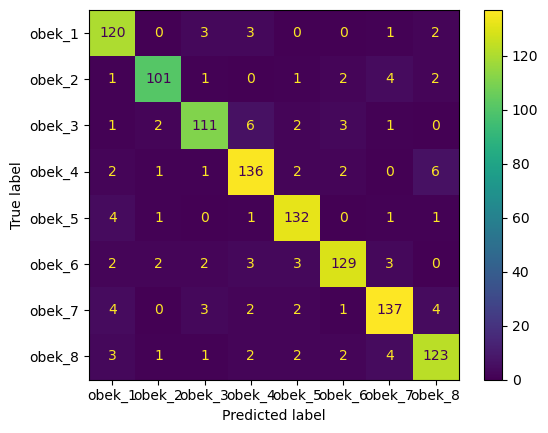

In [33]:
# DecisionTreeClassifier (DTC)
model_fit_and_predict(DecisionTreeClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.4961662496141


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


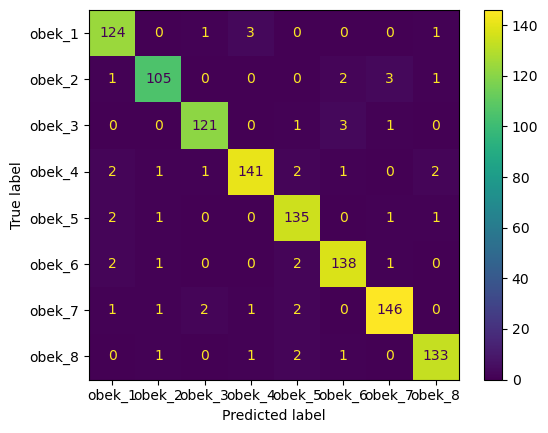

In [34]:
# RandomForestClassifier (RFC)
model_fit_and_predict(RandomForestClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 95.4961662496141


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.960317,126,121,5,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.964286,140,135,5,obek_5
5,obek_6,0.958333,144,138,6,obek_6
6,obek_7,0.954248,153,146,7,obek_7
7,obek_8,0.963768,138,133,5,obek_8


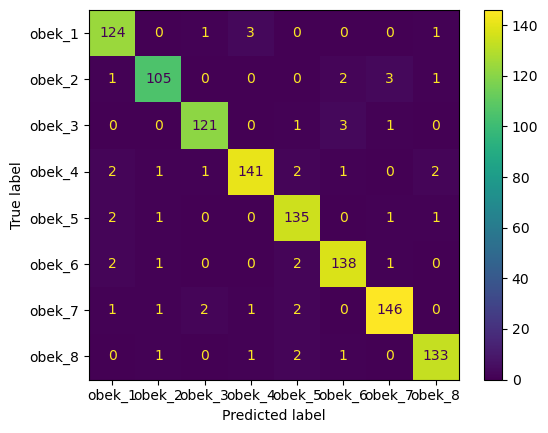

In [35]:
model_fit_and_predict(ExtraTreesClassifier(n_estimators=100, random_state=0), y_label, X_train, y_train, X_valid, y_valid)

[Voting] ....................... (1 of 3) Processing lr, total=   0.6s
[Voting] ....................... (2 of 3) Processing rf, total=   0.5s
[Voting] ...................... (3 of 3) Processing dtc, total=   0.1s
 Toplam Doğruluk: % 94.70805934018365


,label,TruePredsPercent,Sum,true,false,most_frec
0,obek_1,0.961240,129,124,5,obek_1
1,obek_2,0.937500,112,105,7,obek_2
2,obek_3,0.944444,126,119,7,obek_3
3,obek_4,0.940000,150,141,9,obek_4
4,obek_5,0.957143,140,134,6,obek_5
5,obek_6,0.944444,144,136,8,obek_6
6,obek_7,0.928105,153,142,11,obek_7
7,obek_8,0.963768,138,133,5,obek_8


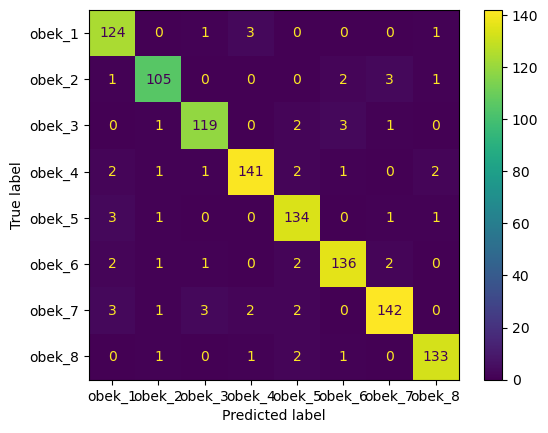

In [36]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dtc', clf4)], voting='hard', verbose=True)

model_fit_and_predict(eclf1, y_label, X_train, y_train, X_valid, y_valid)

In [39]:
model_list = [
    
    LogisticRegression(multi_class='multinomial', random_state=1, solver="newton-cg"), # 0
    
    KNeighborsClassifier(n_neighbors=3), # 1
    
    DecisionTreeClassifier(), # 2
    
    RandomForestClassifier(), # 3
    
    ExtraTreesClassifier(n_estimators=100, random_state=0), # 4
    
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0), # 5
    
    HistGradientBoostingClassifier(), # 6
    
    VotingClassifier(estimators=[('lr', LogisticRegression(multi_class='multinomial', random_state=1)),
                                 ('rf', RandomForestClassifier(n_estimators=50, random_state=1)),
                                 ('dtc', DecisionTreeClassifier())],
                                 voting='hard') # 7
]

fast_model_select(model_list, X, y)

Model 0 Accuracy: %81.92307692307693
Model 1 Accuracy: %79.7802197802198
Model 2 Accuracy: %72.03296703296704
Model 3 Accuracy: %95.45787545787546
Model 4 Accuracy: %95.42124542124543
Model 5 Accuracy: %60.67765567765567
Model 6 Accuracy: %92.82051282051282
Model 7 Accuracy: %91.99633699633699


In [41]:
model = ExtraTreesClassifier(n_estimators=100, random_state=0).fit(X, y)

In [42]:
# Veriyi içeri aktaralım.

# veri yolumuzu verelim
file_path = 'test_x.csv'

# verimizi okuyoruz. 
test_df = pd.read_csv(file_path)

print("Setup Complete")

Setup Complete


In [43]:
test_df

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,Kadın,18-30,Bekar,Yüksekokul Mezunu,Kendi İşinin Sahibi,259190.078834,Küçük Şehir,Ev ve Mobilya,9559.156534,41.883661,Ediyor,117.627785
2336,2336,Kadın,31-40,Evli,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,194580.563177,Kırsal,Ev ve Mobilya,4070.232154,20.082996,Etmiyor,45.659622
2337,2337,Erkek,>60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,357730.521969,Büyük Şehir,Ev ve Mobilya,22589.204381,18.922305,Etmiyor,100.691379
2338,2338,Erkek,18-30,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,213179.637202,Küçük Şehir,Spor Malzemeleri,4205.390562,10.758108,Etmiyor,97.778913


In [45]:
# DataMacpy kütüphanemizdeki fonksiyon ile benzersiz birimi 0'dan fazla olan veri tipi object içeren
# kolonları buluyoruz.
object_cols, d = calc_object_cols(test_df, 0)
d

{'Cinsiyet': 2,
 'Yaş Grubu': 5,
 'Medeni Durum': 2,
 'Eğitim Düzeyi': 9,
 'İstihdam Durumu': 4,
 'Yaşadığı Şehir': 4,
 'En Çok İlgilendiği Ürün Grubu': 5,
 'Eğitime Devam Etme Durumu': 2}

In [46]:
X_test = test_df

In [47]:
# Verilerimize OrdinalEncoder uyguluyoruz. OneHot denemesi yapılacak!
ordinal_encoder = OrdinalEncoder()
X_test[object_cols] = ordinal_encoder.fit_transform(X_test[object_cols])
X_test

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,0.0,3.0,1.0,5.0,0.0,365331.930346,1.0,2.0,5566.587664,15.442635,1.0,19.646460
1,1,0.0,2.0,0.0,3.0,3.0,414899.236174,0.0,4.0,6756.766203,14.957246,1.0,19.675863
2,2,1.0,4.0,1.0,2.0,3.0,152825.872271,2.0,2.0,4493.915682,10.907930,1.0,46.904518
3,3,1.0,3.0,1.0,1.0,0.0,489052.908472,1.0,3.0,42670.646595,32.333021,1.0,48.083609
4,4,0.0,0.0,1.0,5.0,2.0,323635.711534,2.0,2.0,5959.266948,4.519968,1.0,12.752491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2335,1.0,0.0,0.0,6.0,2.0,259190.078834,2.0,1.0,9559.156534,41.883661,0.0,117.627785
2336,2336,1.0,1.0,1.0,3.0,3.0,194580.563177,3.0,1.0,4070.232154,20.082996,1.0,45.659622
2337,2337,0.0,4.0,1.0,5.0,0.0,357730.521969,0.0,1.0,22589.204381,18.922305,1.0,100.691379
2338,2338,0.0,0.0,1.0,1.0,0.0,213179.637202,2.0,4.0,4205.390562,10.758108,1.0,97.778913


In [73]:
y_preds = model.predict(X_test)
y_preds

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  75 out of  75 | elapsed:    0.0s finished


array([2, 2, 1, ..., 6, 4, 5])

In [74]:
# labellerimizi buluyoruz.
y_preds_labelled = l_fit.inverse_transform([i for i in y_preds])
y_preds_labelled

array(['obek_3', 'obek_3', 'obek_2', ..., 'obek_7', 'obek_5', 'obek_6'],
      dtype=object)

In [75]:
y_preds_labelled.shape

(2340,)

In [58]:
sub = pd.DataFrame(columns=["id", "Öbek İsmi"])
sub

,id,Öbek İsmi


In [76]:
sub = pd.DataFrame(data=y_preds_labelled, columns=["Öbek İsmi"])
sub

,Öbek İsmi
0,obek_3
1,obek_3
2,obek_2
3,obek_6
4,obek_1
...,...
2335,obek_8
2336,obek_2
2337,obek_7
2338,obek_5


In [77]:
sub = sub.reset_index()
sub = sub.rename(columns={"index": "id"})

In [78]:
sub

,id,Öbek İsmi
0,0,obek_3
1,1,obek_3
2,2,obek_2
3,3,obek_6
4,4,obek_1
...,...,...
2335,2335,obek_8
2336,2336,obek_2
2337,2337,obek_7
2338,2338,obek_5


In [79]:
sub.to_csv('sample_submission2.csv', index=False, encoding='utf-8')

In [66]:
extc_params = {
    "n_estimators" : [75, 100, 150, 200, 250, 500, 1000],
    "min_samples_split" : [1, 3, 5, 7, 10, 15, 20],
    "n_jobs" : [-1],
    "verbose" : [1]
}

In [67]:
extc_gscv_model = GridSearchCV( 
    ExtraTreesClassifier(),
    extc_params,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X_train, y_train)

extc_gscv_model.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.1s finished


{'min_samples_split': 3, 'n_estimators': 75, 'n_jobs': -1, 'verbose': 1}

In [72]:
model = ExtraTreesClassifier(**extc_gscv_model.best_params_).fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.1s finished


In [82]:
from catboost import CatBoostClassifier

In [88]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000,
                           task_type="GPU",
                           devices='0:1', verbose=0)

In [84]:
fast_model_select([model], X, y)

Learning rate set to 0.084479
0:	learn: 1.6096265	total: 62.3ms	remaining: 1m 2s
1:	learn: 1.3462244	total: 73ms	remaining: 36.4s
2:	learn: 1.1656191	total: 82.6ms	remaining: 27.4s
3:	learn: 1.0321985	total: 92.7ms	remaining: 23.1s
4:	learn: 0.9264250	total: 102ms	remaining: 20.2s
5:	learn: 0.8384894	total: 113ms	remaining: 18.6s
6:	learn: 0.7665309	total: 125ms	remaining: 17.8s
7:	learn: 0.7049897	total: 138ms	remaining: 17.1s
8:	learn: 0.6535771	total: 153ms	remaining: 16.8s
9:	learn: 0.6079018	total: 162ms	remaining: 16s
10:	learn: 0.5692986	total: 171ms	remaining: 15.4s
11:	learn: 0.5347270	total: 180ms	remaining: 14.8s
12:	learn: 0.5053119	total: 190ms	remaining: 14.4s
13:	learn: 0.4787329	total: 200ms	remaining: 14.1s
14:	learn: 0.4557719	total: 209ms	remaining: 13.7s
15:	learn: 0.4352966	total: 217ms	remaining: 13.4s
16:	learn: 0.4163553	total: 228ms	remaining: 13.2s
17:	learn: 0.3998106	total: 241ms	remaining: 13.1s
18:	learn: 0.3854724	total: 250ms	remaining: 12.9s
19:	learn: 

178:	learn: 0.1928758	total: 1.94s	remaining: 8.89s
179:	learn: 0.1925865	total: 1.95s	remaining: 8.88s
180:	learn: 0.1923522	total: 1.96s	remaining: 8.88s
181:	learn: 0.1921183	total: 1.97s	remaining: 8.87s
182:	learn: 0.1918812	total: 1.99s	remaining: 8.88s
183:	learn: 0.1917287	total: 2.01s	remaining: 8.9s
184:	learn: 0.1913332	total: 2.02s	remaining: 8.9s
185:	learn: 0.1910735	total: 2.03s	remaining: 8.9s
186:	learn: 0.1907669	total: 2.04s	remaining: 8.89s
187:	learn: 0.1904825	total: 2.06s	remaining: 8.88s
188:	learn: 0.1900893	total: 2.06s	remaining: 8.86s
189:	learn: 0.1897068	total: 2.08s	remaining: 8.86s
190:	learn: 0.1893107	total: 2.09s	remaining: 8.85s
191:	learn: 0.1891010	total: 2.1s	remaining: 8.83s
192:	learn: 0.1888612	total: 2.11s	remaining: 8.81s
193:	learn: 0.1885686	total: 2.12s	remaining: 8.79s
194:	learn: 0.1882262	total: 2.13s	remaining: 8.78s
195:	learn: 0.1877990	total: 2.14s	remaining: 8.78s
196:	learn: 0.1874205	total: 2.15s	remaining: 8.79s
197:	learn: 0.18

342:	learn: 0.1449274	total: 3.78s	remaining: 7.23s
343:	learn: 0.1447157	total: 3.79s	remaining: 7.22s
344:	learn: 0.1443412	total: 3.8s	remaining: 7.21s
345:	learn: 0.1440310	total: 3.81s	remaining: 7.2s
346:	learn: 0.1436311	total: 3.82s	remaining: 7.19s
347:	learn: 0.1434831	total: 3.83s	remaining: 7.17s
348:	learn: 0.1430501	total: 3.84s	remaining: 7.16s
349:	learn: 0.1428544	total: 3.85s	remaining: 7.15s
350:	learn: 0.1427086	total: 3.86s	remaining: 7.14s
351:	learn: 0.1425557	total: 3.87s	remaining: 7.12s
352:	learn: 0.1423681	total: 3.88s	remaining: 7.11s
353:	learn: 0.1420074	total: 3.89s	remaining: 7.09s
354:	learn: 0.1418149	total: 3.9s	remaining: 7.08s
355:	learn: 0.1416394	total: 3.91s	remaining: 7.07s
356:	learn: 0.1414799	total: 3.92s	remaining: 7.07s
357:	learn: 0.1410829	total: 3.93s	remaining: 7.05s
358:	learn: 0.1406723	total: 3.94s	remaining: 7.04s
359:	learn: 0.1403982	total: 3.95s	remaining: 7.03s
360:	learn: 0.1402604	total: 3.96s	remaining: 7.01s
361:	learn: 0.1

519:	learn: 0.1065770	total: 5.61s	remaining: 5.17s
520:	learn: 0.1065058	total: 5.62s	remaining: 5.16s
521:	learn: 0.1063443	total: 5.63s	remaining: 5.15s
522:	learn: 0.1061880	total: 5.64s	remaining: 5.14s
523:	learn: 0.1060197	total: 5.65s	remaining: 5.13s
524:	learn: 0.1058018	total: 5.66s	remaining: 5.12s
525:	learn: 0.1055582	total: 5.67s	remaining: 5.11s
526:	learn: 0.1054280	total: 5.68s	remaining: 5.1s
527:	learn: 0.1053062	total: 5.69s	remaining: 5.09s
528:	learn: 0.1051313	total: 5.7s	remaining: 5.07s
529:	learn: 0.1049515	total: 5.71s	remaining: 5.06s
530:	learn: 0.1047850	total: 5.72s	remaining: 5.05s
531:	learn: 0.1046374	total: 5.73s	remaining: 5.04s
532:	learn: 0.1045537	total: 5.74s	remaining: 5.03s
533:	learn: 0.1043620	total: 5.76s	remaining: 5.02s
534:	learn: 0.1042702	total: 5.77s	remaining: 5.01s
535:	learn: 0.1041254	total: 5.78s	remaining: 5s
536:	learn: 0.1039712	total: 5.79s	remaining: 4.99s
537:	learn: 0.1037898	total: 5.79s	remaining: 4.97s
538:	learn: 0.103

697:	learn: 0.0791543	total: 7.43s	remaining: 3.22s
698:	learn: 0.0789912	total: 7.45s	remaining: 3.21s
699:	learn: 0.0788815	total: 7.46s	remaining: 3.19s
700:	learn: 0.0786726	total: 7.46s	remaining: 3.18s
701:	learn: 0.0785834	total: 7.47s	remaining: 3.17s
702:	learn: 0.0784509	total: 7.48s	remaining: 3.16s
703:	learn: 0.0783360	total: 7.49s	remaining: 3.15s
704:	learn: 0.0781641	total: 7.5s	remaining: 3.14s
705:	learn: 0.0780861	total: 7.51s	remaining: 3.13s
706:	learn: 0.0778500	total: 7.52s	remaining: 3.12s
707:	learn: 0.0777297	total: 7.53s	remaining: 3.11s
708:	learn: 0.0776659	total: 7.54s	remaining: 3.1s
709:	learn: 0.0775920	total: 7.55s	remaining: 3.08s
710:	learn: 0.0775654	total: 7.56s	remaining: 3.07s
711:	learn: 0.0774914	total: 7.57s	remaining: 3.06s
712:	learn: 0.0773770	total: 7.58s	remaining: 3.05s
713:	learn: 0.0772237	total: 7.59s	remaining: 3.04s
714:	learn: 0.0771598	total: 7.61s	remaining: 3.03s
715:	learn: 0.0770590	total: 7.61s	remaining: 3.02s
716:	learn: 0.

859:	learn: 0.0615036	total: 9.06s	remaining: 1.47s
860:	learn: 0.0613074	total: 9.07s	remaining: 1.46s
861:	learn: 0.0612159	total: 9.08s	remaining: 1.45s
862:	learn: 0.0611184	total: 9.1s	remaining: 1.44s
863:	learn: 0.0610197	total: 9.11s	remaining: 1.43s
864:	learn: 0.0609834	total: 9.12s	remaining: 1.42s
865:	learn: 0.0607883	total: 9.13s	remaining: 1.41s
866:	learn: 0.0607202	total: 9.13s	remaining: 1.4s
867:	learn: 0.0606282	total: 9.14s	remaining: 1.39s
868:	learn: 0.0604925	total: 9.15s	remaining: 1.38s
869:	learn: 0.0604155	total: 9.16s	remaining: 1.37s
870:	learn: 0.0603478	total: 9.17s	remaining: 1.36s
871:	learn: 0.0601267	total: 9.18s	remaining: 1.35s
872:	learn: 0.0600464	total: 9.19s	remaining: 1.34s
873:	learn: 0.0599655	total: 9.2s	remaining: 1.33s
874:	learn: 0.0597913	total: 9.21s	remaining: 1.31s
875:	learn: 0.0596619	total: 9.22s	remaining: 1.3s
876:	learn: 0.0595865	total: 9.23s	remaining: 1.29s
877:	learn: 0.0595332	total: 9.24s	remaining: 1.28s
878:	learn: 0.05

18:	learn: 0.3944784	total: 195ms	remaining: 10.1s
19:	learn: 0.3812496	total: 205ms	remaining: 10s
20:	learn: 0.3695693	total: 217ms	remaining: 10.1s
21:	learn: 0.3594401	total: 230ms	remaining: 10.2s
22:	learn: 0.3501535	total: 241ms	remaining: 10.2s
23:	learn: 0.3419044	total: 250ms	remaining: 10.2s
24:	learn: 0.3343470	total: 260ms	remaining: 10.2s
25:	learn: 0.3274389	total: 270ms	remaining: 10.1s
26:	learn: 0.3218092	total: 281ms	remaining: 10.1s
27:	learn: 0.3164060	total: 297ms	remaining: 10.3s
28:	learn: 0.3114078	total: 308ms	remaining: 10.3s
29:	learn: 0.3069544	total: 318ms	remaining: 10.3s
30:	learn: 0.3029475	total: 329ms	remaining: 10.3s
31:	learn: 0.2988163	total: 339ms	remaining: 10.2s
32:	learn: 0.2954851	total: 347ms	remaining: 10.2s
33:	learn: 0.2921601	total: 358ms	remaining: 10.2s
34:	learn: 0.2890018	total: 368ms	remaining: 10.2s
35:	learn: 0.2861102	total: 377ms	remaining: 10.1s
36:	learn: 0.2833194	total: 386ms	remaining: 10s
37:	learn: 0.2810521	total: 395ms	r

190:	learn: 0.1893358	total: 2.02s	remaining: 8.55s
191:	learn: 0.1888291	total: 2.03s	remaining: 8.54s
192:	learn: 0.1885607	total: 2.04s	remaining: 8.54s
193:	learn: 0.1881083	total: 2.05s	remaining: 8.52s
194:	learn: 0.1878015	total: 2.06s	remaining: 8.51s
195:	learn: 0.1875702	total: 2.07s	remaining: 8.49s
196:	learn: 0.1873196	total: 2.08s	remaining: 8.48s
197:	learn: 0.1870669	total: 2.09s	remaining: 8.46s
198:	learn: 0.1868823	total: 2.1s	remaining: 8.44s
199:	learn: 0.1866729	total: 2.11s	remaining: 8.43s
200:	learn: 0.1861616	total: 2.12s	remaining: 8.41s
201:	learn: 0.1859032	total: 2.13s	remaining: 8.4s
202:	learn: 0.1855631	total: 2.14s	remaining: 8.4s
203:	learn: 0.1851434	total: 2.15s	remaining: 8.38s
204:	learn: 0.1848081	total: 2.16s	remaining: 8.37s
205:	learn: 0.1843840	total: 2.17s	remaining: 8.35s
206:	learn: 0.1841403	total: 2.18s	remaining: 8.34s
207:	learn: 0.1836476	total: 2.19s	remaining: 8.35s
208:	learn: 0.1831696	total: 2.2s	remaining: 8.33s
209:	learn: 0.18

364:	learn: 0.1397118	total: 3.85s	remaining: 6.7s
365:	learn: 0.1393150	total: 3.87s	remaining: 6.71s
366:	learn: 0.1389649	total: 3.88s	remaining: 6.7s
367:	learn: 0.1387664	total: 3.9s	remaining: 6.69s
368:	learn: 0.1384810	total: 3.9s	remaining: 6.68s
369:	learn: 0.1381344	total: 3.91s	remaining: 6.66s
370:	learn: 0.1377781	total: 3.92s	remaining: 6.65s
371:	learn: 0.1375368	total: 3.93s	remaining: 6.64s
372:	learn: 0.1373804	total: 3.94s	remaining: 6.63s
373:	learn: 0.1372511	total: 3.95s	remaining: 6.61s
374:	learn: 0.1369263	total: 3.96s	remaining: 6.6s
375:	learn: 0.1367012	total: 3.97s	remaining: 6.59s
376:	learn: 0.1364598	total: 3.98s	remaining: 6.58s
377:	learn: 0.1362261	total: 3.99s	remaining: 6.57s
378:	learn: 0.1360652	total: 4s	remaining: 6.56s
379:	learn: 0.1358585	total: 4.01s	remaining: 6.55s
380:	learn: 0.1357518	total: 4.02s	remaining: 6.53s
381:	learn: 0.1353518	total: 4.03s	remaining: 6.52s
382:	learn: 0.1351931	total: 4.04s	remaining: 6.5s
383:	learn: 0.1348934

542:	learn: 0.1022720	total: 5.68s	remaining: 4.78s
543:	learn: 0.1020300	total: 5.68s	remaining: 4.76s
544:	learn: 0.1019346	total: 5.7s	remaining: 4.75s
545:	learn: 0.1017131	total: 5.71s	remaining: 4.75s
546:	learn: 0.1015819	total: 5.72s	remaining: 4.74s
547:	learn: 0.1012688	total: 5.73s	remaining: 4.72s
548:	learn: 0.1011385	total: 5.74s	remaining: 4.71s
549:	learn: 0.1009805	total: 5.75s	remaining: 4.7s
550:	learn: 0.1007794	total: 5.76s	remaining: 4.69s
551:	learn: 0.1005081	total: 5.77s	remaining: 4.68s
552:	learn: 0.1004147	total: 5.78s	remaining: 4.67s
553:	learn: 0.1002770	total: 5.79s	remaining: 4.66s
554:	learn: 0.1000985	total: 5.79s	remaining: 4.65s
555:	learn: 0.0999077	total: 5.8s	remaining: 4.63s
556:	learn: 0.0997224	total: 5.81s	remaining: 4.62s
557:	learn: 0.0994961	total: 5.83s	remaining: 4.62s
558:	learn: 0.0992917	total: 5.84s	remaining: 4.61s
559:	learn: 0.0991342	total: 5.85s	remaining: 4.59s
560:	learn: 0.0989307	total: 5.86s	remaining: 4.58s
561:	learn: 0.0

705:	learn: 0.0781615	total: 7.5s	remaining: 3.12s
706:	learn: 0.0779815	total: 7.51s	remaining: 3.11s
707:	learn: 0.0779345	total: 7.53s	remaining: 3.1s
708:	learn: 0.0778302	total: 7.54s	remaining: 3.1s
709:	learn: 0.0777349	total: 7.55s	remaining: 3.08s
710:	learn: 0.0776248	total: 7.57s	remaining: 3.08s
711:	learn: 0.0774463	total: 7.58s	remaining: 3.06s
712:	learn: 0.0773173	total: 7.59s	remaining: 3.05s
713:	learn: 0.0771781	total: 7.6s	remaining: 3.04s
714:	learn: 0.0769328	total: 7.61s	remaining: 3.03s
715:	learn: 0.0766902	total: 7.62s	remaining: 3.02s
716:	learn: 0.0765554	total: 7.63s	remaining: 3.01s
717:	learn: 0.0764433	total: 7.64s	remaining: 3s
718:	learn: 0.0763487	total: 7.65s	remaining: 2.99s
719:	learn: 0.0762472	total: 7.67s	remaining: 2.98s
720:	learn: 0.0761338	total: 7.67s	remaining: 2.97s
721:	learn: 0.0759962	total: 7.69s	remaining: 2.96s
722:	learn: 0.0758982	total: 7.7s	remaining: 2.95s
723:	learn: 0.0756965	total: 7.71s	remaining: 2.94s
724:	learn: 0.075609

873:	learn: 0.0591996	total: 9.35s	remaining: 1.35s
874:	learn: 0.0589316	total: 9.36s	remaining: 1.34s
875:	learn: 0.0588489	total: 9.37s	remaining: 1.32s
876:	learn: 0.0587472	total: 9.38s	remaining: 1.31s
877:	learn: 0.0586435	total: 9.39s	remaining: 1.3s
878:	learn: 0.0585639	total: 9.4s	remaining: 1.29s
879:	learn: 0.0585382	total: 9.41s	remaining: 1.28s
880:	learn: 0.0584108	total: 9.42s	remaining: 1.27s
881:	learn: 0.0582876	total: 9.43s	remaining: 1.26s
882:	learn: 0.0582409	total: 9.44s	remaining: 1.25s
883:	learn: 0.0581758	total: 9.45s	remaining: 1.24s
884:	learn: 0.0580906	total: 9.46s	remaining: 1.23s
885:	learn: 0.0580281	total: 9.47s	remaining: 1.22s
886:	learn: 0.0579833	total: 9.48s	remaining: 1.21s
887:	learn: 0.0579318	total: 9.5s	remaining: 1.2s
888:	learn: 0.0578107	total: 9.51s	remaining: 1.19s
889:	learn: 0.0577783	total: 9.52s	remaining: 1.18s
890:	learn: 0.0577143	total: 9.53s	remaining: 1.17s
891:	learn: 0.0576225	total: 9.54s	remaining: 1.15s
892:	learn: 0.05

38:	learn: 0.2782392	total: 391ms	remaining: 9.64s
39:	learn: 0.2763448	total: 402ms	remaining: 9.65s
40:	learn: 0.2744901	total: 416ms	remaining: 9.72s
41:	learn: 0.2731430	total: 426ms	remaining: 9.71s
42:	learn: 0.2717767	total: 436ms	remaining: 9.7s
43:	learn: 0.2702496	total: 444ms	remaining: 9.65s
44:	learn: 0.2689839	total: 453ms	remaining: 9.62s
45:	learn: 0.2675945	total: 463ms	remaining: 9.59s
46:	learn: 0.2665630	total: 472ms	remaining: 9.58s
47:	learn: 0.2653222	total: 482ms	remaining: 9.57s
48:	learn: 0.2640822	total: 492ms	remaining: 9.54s
49:	learn: 0.2630910	total: 502ms	remaining: 9.54s
50:	learn: 0.2621716	total: 516ms	remaining: 9.59s
51:	learn: 0.2615091	total: 530ms	remaining: 9.66s
52:	learn: 0.2607234	total: 542ms	remaining: 9.68s
53:	learn: 0.2598858	total: 555ms	remaining: 9.73s
54:	learn: 0.2590791	total: 573ms	remaining: 9.85s
55:	learn: 0.2582523	total: 586ms	remaining: 9.87s
56:	learn: 0.2573523	total: 596ms	remaining: 9.87s
57:	learn: 0.2566088	total: 609m

215:	learn: 0.1805069	total: 2.21s	remaining: 8.03s
216:	learn: 0.1799243	total: 2.22s	remaining: 8.02s
217:	learn: 0.1797452	total: 2.23s	remaining: 8.02s
218:	learn: 0.1794527	total: 2.25s	remaining: 8.02s
219:	learn: 0.1792136	total: 2.26s	remaining: 8.01s
220:	learn: 0.1787464	total: 2.27s	remaining: 7.99s
221:	learn: 0.1783566	total: 2.28s	remaining: 7.98s
222:	learn: 0.1781146	total: 2.29s	remaining: 7.96s
223:	learn: 0.1778416	total: 2.29s	remaining: 7.95s
224:	learn: 0.1774723	total: 2.3s	remaining: 7.94s
225:	learn: 0.1769522	total: 2.31s	remaining: 7.92s
226:	learn: 0.1766202	total: 2.32s	remaining: 7.91s
227:	learn: 0.1764229	total: 2.33s	remaining: 7.9s
228:	learn: 0.1761081	total: 2.34s	remaining: 7.88s
229:	learn: 0.1756964	total: 2.35s	remaining: 7.87s
230:	learn: 0.1754890	total: 2.36s	remaining: 7.86s
231:	learn: 0.1749225	total: 2.37s	remaining: 7.84s
232:	learn: 0.1745834	total: 2.38s	remaining: 7.83s
233:	learn: 0.1742565	total: 2.39s	remaining: 7.83s
234:	learn: 0.

375:	learn: 0.1315477	total: 3.84s	remaining: 6.37s
376:	learn: 0.1313247	total: 3.85s	remaining: 6.36s
377:	learn: 0.1311667	total: 3.86s	remaining: 6.36s
378:	learn: 0.1310076	total: 3.87s	remaining: 6.34s
379:	learn: 0.1307197	total: 3.88s	remaining: 6.34s
380:	learn: 0.1305707	total: 3.89s	remaining: 6.32s
381:	learn: 0.1302831	total: 3.9s	remaining: 6.31s
382:	learn: 0.1300989	total: 3.91s	remaining: 6.3s
383:	learn: 0.1298014	total: 3.92s	remaining: 6.29s
384:	learn: 0.1295906	total: 3.93s	remaining: 6.28s
385:	learn: 0.1293654	total: 3.94s	remaining: 6.27s
386:	learn: 0.1291182	total: 3.95s	remaining: 6.25s
387:	learn: 0.1288941	total: 3.96s	remaining: 6.24s
388:	learn: 0.1287420	total: 3.97s	remaining: 6.23s
389:	learn: 0.1284162	total: 3.98s	remaining: 6.22s
390:	learn: 0.1282110	total: 3.98s	remaining: 6.21s
391:	learn: 0.1279750	total: 3.99s	remaining: 6.2s
392:	learn: 0.1277275	total: 4s	remaining: 6.18s
393:	learn: 0.1273910	total: 4.01s	remaining: 6.17s
394:	learn: 0.1271

554:	learn: 0.0956054	total: 5.65s	remaining: 4.53s
555:	learn: 0.0954542	total: 5.67s	remaining: 4.53s
556:	learn: 0.0952927	total: 5.68s	remaining: 4.52s
557:	learn: 0.0951413	total: 5.7s	remaining: 4.51s
558:	learn: 0.0949811	total: 5.71s	remaining: 4.5s
559:	learn: 0.0947223	total: 5.72s	remaining: 4.49s
560:	learn: 0.0945854	total: 5.73s	remaining: 4.48s
561:	learn: 0.0944218	total: 5.74s	remaining: 4.47s
562:	learn: 0.0942605	total: 5.74s	remaining: 4.46s
563:	learn: 0.0939914	total: 5.75s	remaining: 4.45s
564:	learn: 0.0939141	total: 5.76s	remaining: 4.44s
565:	learn: 0.0937750	total: 5.77s	remaining: 4.42s
566:	learn: 0.0936715	total: 5.78s	remaining: 4.41s
567:	learn: 0.0935350	total: 5.79s	remaining: 4.4s
568:	learn: 0.0933987	total: 5.8s	remaining: 4.39s
569:	learn: 0.0932992	total: 5.81s	remaining: 4.38s
570:	learn: 0.0930055	total: 5.82s	remaining: 4.37s
571:	learn: 0.0929302	total: 5.82s	remaining: 4.36s
572:	learn: 0.0927337	total: 5.83s	remaining: 4.35s
573:	learn: 0.09

733:	learn: 0.0698426	total: 7.5s	remaining: 2.72s
734:	learn: 0.0697204	total: 7.51s	remaining: 2.71s
735:	learn: 0.0696155	total: 7.52s	remaining: 2.7s
736:	learn: 0.0695147	total: 7.54s	remaining: 2.69s
737:	learn: 0.0693768	total: 7.55s	remaining: 2.68s
738:	learn: 0.0692695	total: 7.56s	remaining: 2.67s
739:	learn: 0.0691051	total: 7.57s	remaining: 2.66s
740:	learn: 0.0690279	total: 7.58s	remaining: 2.65s
741:	learn: 0.0688847	total: 7.59s	remaining: 2.64s
742:	learn: 0.0687729	total: 7.6s	remaining: 2.63s
743:	learn: 0.0686447	total: 7.61s	remaining: 2.62s
744:	learn: 0.0685510	total: 7.61s	remaining: 2.61s
745:	learn: 0.0684376	total: 7.62s	remaining: 2.6s
746:	learn: 0.0683493	total: 7.63s	remaining: 2.58s
747:	learn: 0.0682243	total: 7.64s	remaining: 2.57s
748:	learn: 0.0681170	total: 7.65s	remaining: 2.56s
749:	learn: 0.0680052	total: 7.66s	remaining: 2.55s
750:	learn: 0.0679093	total: 7.67s	remaining: 2.54s
751:	learn: 0.0677297	total: 7.68s	remaining: 2.53s
752:	learn: 0.06

911:	learn: 0.0520754	total: 9.32s	remaining: 899ms
912:	learn: 0.0519752	total: 9.33s	remaining: 889ms
913:	learn: 0.0518766	total: 9.34s	remaining: 879ms
914:	learn: 0.0518445	total: 9.35s	remaining: 869ms
915:	learn: 0.0517506	total: 9.36s	remaining: 859ms
916:	learn: 0.0516883	total: 9.37s	remaining: 848ms
917:	learn: 0.0516073	total: 9.38s	remaining: 838ms
918:	learn: 0.0515036	total: 9.39s	remaining: 828ms
919:	learn: 0.0514223	total: 9.4s	remaining: 817ms
920:	learn: 0.0514032	total: 9.41s	remaining: 807ms
921:	learn: 0.0513146	total: 9.42s	remaining: 797ms
922:	learn: 0.0512744	total: 9.43s	remaining: 786ms
923:	learn: 0.0511931	total: 9.44s	remaining: 776ms
924:	learn: 0.0511065	total: 9.45s	remaining: 766ms
925:	learn: 0.0510542	total: 9.45s	remaining: 756ms
926:	learn: 0.0509308	total: 9.46s	remaining: 745ms
927:	learn: 0.0508370	total: 9.47s	remaining: 735ms
928:	learn: 0.0507512	total: 9.48s	remaining: 725ms
929:	learn: 0.0506696	total: 9.49s	remaining: 714ms
930:	learn: 0

In [85]:
# Veriyi içeri aktaralım.

# veri yolumuzu verelim
file_path = 'train.csv'

# verimizi okuyoruz. 
df = pd.read_csv(file_path)

print("Setup Complete")

Setup Complete


In [86]:
y = df["Öbek İsmi"]
y

0       obek_4
1       obek_5
2       obek_8
3       obek_3
4       obek_3
         ...  
5455    obek_6
5456    obek_6
5457    obek_1
5458    obek_8
5459    obek_8
Name: Öbek İsmi, Length: 5460, dtype: object

In [87]:
# özniteliklerimizi belirleyelim.
X = df
X.drop(["Öbek İsmi"], axis=1, inplace=True) # tüm verilerimizden hedef kolonumuzu çıkarıyoruz.
# Number kolonumuzu da gereksiz olduğu eğitimde gereksiz olduğu için çıkarıyoruz.
X

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,31.356284,Etmiyor,51.600436
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,26.288620,Etmiyor,49.190536
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,5.156906,Etmiyor,9.537384
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.268016,Büyük Şehir,Ev ve Mobilya,9016.165906,39.205399,Ediyor,143.281718


In [89]:
fast_model_select([model], X, y)

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2275, in _catboost.get_float_feature
  File "_catboost.pyx", line 1128, in _catboost._FloatOrNan
  File "_catboost.pyx", line 949, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'b'Erkek'' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 5007, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 2262, in _fit
    train_params = self._prepare_train_params(
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 2148, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs,
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 1430, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, weight=sample_weight, group_id=group_id,
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 790, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 1411, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "_catboost.pyx", line 3941, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 3991, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 3807, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 2775, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2316, in _catboost.create_num_factor_data
  File "_catboost.pyx", line 2277, in _catboost.get_float_feature
_catboost.CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="Erkek": Cannot convert 'b'Erkek'' to float

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2275, in _catboost.get_float_feature
  File "_catboost.pyx", line 1128, in _catboost._FloatOrNan
  File "_catboost.pyx", line 949, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'b'Kad\xc4\xb1n'' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 5007, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 2262, in _fit
    train_params = self._prepare_train_params(
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 2148, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs,
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 1430, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, weight=sample_weight, group_id=group_id,
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 790, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "D:\Programlar\Anaconda3\envs\all_new\lib\site-packages\catboost\core.py", line 1411, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "_catboost.pyx", line 3941, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 3991, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 3807, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 2775, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2316, in _catboost.create_num_factor_data
  File "_catboost.pyx", line 2277, in _catboost.get_float_feature
_catboost.CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="Kadın": Cannot convert 'b'Kad\xc4\xb1n'' to float
